In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNet

In [4]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

C:\Users\Aryan\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Aryan\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Aryan\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,847.0,4536.0,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",74311.0,69.0,161.0,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,3557.0


In [8]:
test.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA
3,494,Measuring RPM with a spectrum analyzer mobile app,Matthias Wandel,26.0,2018-02-06,"rpm|""woodworking""|""tool speed""|""blade speed""|""...",89664.0,145.0,324.0,Using a spectrum analyzer app to analyze the s...,US
4,73942,Anchor Anasuya responded on Phone breaking iss...,AVA Creative thoughts,22.0,2018-02-06,"anasuya responded|""anasuya issue""|""anasuya bor...",53526.0,357.0,153.0,Welcome to AVA Creative thoughts Channel Subsc...,IN


In [9]:
print(train.shape)
print(test.shape)

(26061, 12)
(11170, 11)


In [10]:
ID_COL,TARGET_COL="video_id","likes"

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [12]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [13]:
num_cols = ["views","dislikes","comment_count"]
cat_cols = ["category_id","country_code"]
text_cols = ["title","channel_title","tags","description"]
date_cols = ["publish_date"]

In [14]:
dataframe = pd.concat([train,test]).reset_index(drop=True)

In [15]:
dataframe.shape

(37231, 12)

In [16]:
dataframe.isnull().sum()

video_id             0
title                0
channel_title        0
category_id          0
publish_date         0
tags                 0
views                0
dislikes             0
comment_count        0
description          0
country_code         0
likes            11170
dtype: int64

In [17]:
dataframe.tail(1)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
37230,6514,They Are Doing Things That Should Truly Scare You,Amplex,24.0,2018-03-08,"educational|""secrets""|""hidden""|""truth""|""myster...",148070.0,188.0,935.0,➨Check Out our Online Store: https://amplex-li...,CA,NaN


In [18]:
dataframe = pd.get_dummies(dataframe,columns=cat_cols)

In [19]:
dataframe.shape

(37231, 31)

In [20]:
dataframe.head(1)

,video_id,title,channel_title,publish_date,tags,views,dislikes,comment_count,description,likes,...,category_id_26.0,category_id_27.0,category_id_28.0,category_id_29.0,category_id_30.0,category_id_43.0,country_code_CA,country_code_GB,country_code_IN,country_code_US
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,2351.0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
dataframe=dataframe.fillna(0)
dataframe.isnull().sum().sum()

0

In [22]:
for i in num_cols:
    dataframe[i] = np.log1p(dataframe[i])

In [23]:
dataframe["likes"] = np.log1p(dataframe["likes"])

In [24]:
train_proc,test_proc = dataframe[:train.shape[0]],dataframe[train.shape[0]:].reset_index(drop=True)

In [25]:
features = [c for c in dataframe.columns if c not in [ID_COL,TARGET_COL]]

In [26]:
trn,val = train_test_split(train_proc,test_size=0.2,random_state = 1)

In [27]:
x_trn,x_val = trn[features],val[features]
y_trn,y_val = trn[TARGET_COL],val[TARGET_COL]
x_test = test_proc[features]

In [28]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true,y_pred))
def av_metric(y_true,y_pred):
    return 1000*np.sqrt(mean_squared_error(y_true,y_pred))

Only numerical columns

In [29]:
clf = LinearRegression()
_ = clf.fit(x_trn[num_cols],y_trn)
pred_val = clf.predict(x_val[num_cols])
av_metric_score = av_metric(y_val,pred_val)
print(f"The av metric score is {av_metric_score}")

The av metric score is 949.5701548787257


Numerical + category columns

In [30]:
x_trn.columns

Index(['title', 'channel_title', 'publish_date', 'tags', 'views', 'dislikes',
       'comment_count', 'description', 'category_id_1.0', 'category_id_2.0',
       'category_id_10.0', 'category_id_15.0', 'category_id_17.0',
       'category_id_19.0', 'category_id_20.0', 'category_id_22.0',
       'category_id_23.0', 'category_id_24.0', 'category_id_25.0',
       'category_id_26.0', 'category_id_27.0', 'category_id_28.0',
       'category_id_29.0', 'category_id_30.0', 'category_id_43.0',
       'country_code_CA', 'country_code_GB', 'country_code_IN',
       'country_code_US'],
      dtype='object')

In [31]:
features = [c for c in x_trn if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in x_trn if c not in text_cols + date_cols]

In [32]:
clf = LinearRegression()
_ = clf.fit(x_trn[cat_num_cols],y_trn)
pred_val = clf.predict(x_val[cat_num_cols])
av_metric_score = av_metric(y_val,pred_val)
print(f"The av metric score is {av_metric_score}")

The av metric score is 873.0627392234118


In [33]:
from sklearn.model_selection import RandomizedSearchCV

max_depth =[4,6,8,10,12]
min_samples_split =[2,10,20,30,40]
max_features = [0.2,0.4,0.6,0.8,1]
max_leaf_nodes =[8,16,32,64,128]

params = dict(max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features,max_leaf_nodes=max_leaf_nodes)

clf = RandomizedSearchCV(estimator= DecisionTreeRegressor(),
                        param_distributions=params,
                        scoring = "neg_root_mean_squared_error",
                        random_state = 1,
                        n_iter = 20)

search = clf.fit(train_proc[cat_num_cols],train_proc[TARGET_COL])

search.best_params_

{'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

In [34]:
best_param = {'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

clf = DecisionTreeRegressor(**best_param)
_ = clf.fit(x_trn[cat_num_cols],y_trn)
pred_val = clf.predict(x_val[cat_num_cols])
av_metric_score = av_metric(y_val,pred_val)
print(f"The av metric score is {av_metric_score}")

The av metric score is 775.950833783305


Stratified K FOLD

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
def run_kfold(clf,train,test,features):
    N_SPLITS = 5
    
    oofs = np.zeros(len(train)) #out of folds
    preds = np.zeros(len(test)) #prediction
    
    target = train[TARGET_COL]
    
    folds = StratifiedKFold(n_splits=N_SPLITS)
    stratified_target = pd.qcut(train[TARGET_COL],10,labels=False,duplicates="drop")
    
    for fold_, (trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f"\n------------------ Fold {fold_ +1}-------------------")
        
        ############ Get train,test and validation sets along with target#################
        
        ### Training Set
        x_trn, y_trn = train[features].iloc[trn_idx] ,target.iloc[trn_idx]
        
        ### Validation Set
        x_val ,y_val = train[features].iloc[val_idx], target.iloc[val_idx]
        
        ### Test Set
        x_test = test[features]
        
        ########## Scaling Data ##############
        scaler = StandardScaler()
        _ = scaler.fit(x_trn)
        
        x_trn = scaler.transform(x_trn)
        x_val = scaler.transform(x_val)
        x_test = scaler.transform(x_test)
        
        ############## Fitting and Predicting ##################
        _ = clf.fit(x_trn,y_trn)
        
        ### Instead of directly predicting the classes we will obtain the probability of the positive class
        preds_val = clf.predict(x_val)
        preds_test = clf.predict(x_test)
        
        folds_score = av_metric(y_val,preds_val)
        print(f"\nAV metric score for the validation set is {folds_score}")
        
        oofs[val_idx] = preds_val
        preds += preds_test/N_SPLITS
        
    oofs_score = av_metric(target,oofs)
    print(f"\nAv metric score for oofs is {oofs_score}")
        
    return oofs,preds        

SKFolds on Decision tree

In [37]:
dt_params = {'min_samples_split': 30,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

clf = DecisionTreeRegressor(**dt_params)

dt_oofs,dt_preds = run_kfold(clf,train_proc,test_proc,cat_num_cols)


------------------ Fold 1-------------------

AV metric score for the validation set is 753.615155838875

------------------ Fold 2-------------------

AV metric score for the validation set is 772.4198633631812

------------------ Fold 3-------------------

AV metric score for the validation set is 756.7837306807289

------------------ Fold 4-------------------

AV metric score for the validation set is 772.1794247956065

------------------ Fold 5-------------------

AV metric score for the validation set is 752.9029270077011

Av metric score for oofs is 761.6313300465082


## Gradient Boosting

In [38]:
clf =LGBMRegressor()
lgbm_oofs,lgbm_preds = run_kfold(clf,train_proc,test_proc,cat_num_cols)


------------------ Fold 1-------------------

AV metric score for the validation set is 674.7737515393275

------------------ Fold 2-------------------

AV metric score for the validation set is 678.3212622895253

------------------ Fold 3-------------------

AV metric score for the validation set is 669.5119539218649

------------------ Fold 4-------------------

AV metric score for the validation set is 665.6236530707358

------------------ Fold 5-------------------

AV metric score for the validation set is 671.8950668383243

Av metric score for oofs is 672.0393057033824


Tuning LGBM

Early Stopping = When the model starts to overfit

In [39]:
def run_gradient_boosting(clf,fit_params,train,test,features):
    N_SPLITS = 5
    
    oofs = np.zeros(len(train)) #out of folds
    preds = np.zeros(len(test)) #prediction
    
    target = train[TARGET_COL]
    
    folds = StratifiedKFold(n_splits=N_SPLITS)
    stratified_target = pd.qcut(train[TARGET_COL],10,labels=False,duplicates="drop")
    
    feature_importances = pd.DataFrame()
    
    for fold_, (trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f"\n------------------ Fold {fold_ +1}-------------------")
        
        ############ Get train,test and validation sets along with target#################
        
        ### Training Set
        x_trn, y_trn = train[features].iloc[trn_idx] ,target.iloc[trn_idx]
        
        ### Validation Set
        x_val ,y_val = train[features].iloc[val_idx], target.iloc[val_idx]
        
        ### Test Set
        x_test = test[features]
        
        ########## Scaling Data ##############
        scaler = StandardScaler()
        _ = scaler.fit(x_trn)
        
        x_trn = scaler.transform(x_trn)
        x_val = scaler.transform(x_val)
        x_test = scaler.transform(x_test)
        
        ############## Fitting and Predicting ##################
        _ = clf.fit(x_trn,y_trn,eval_set=[(x_val,y_val)],**fit_params)
        
        fold_importance = pd.DataFrame({"fold":fold_+1,"feature":features,"importance":clf.feature_importances_})
        feature_importances = pd.concat([feature_importances,fold_importance],axis=0)
        
         ### Instead of directly predicting the classes we will obtain the probability of the positive class
        preds_val = clf.predict(x_val)
        preds_test = clf.predict(x_test)
        
        folds_score = av_metric(y_val,preds_val)
        print(f"\nAV metric score for the validation set is {folds_score}")
        
        oofs[val_idx] = preds_val
        preds += preds_test/N_SPLITS
        
    
    oofs_score = av_metric(target,oofs)
    print(f"\nAv metric score for oofs is {oofs_score}")
    
    feature_importances = feature_importances.reset_index(drop=True)
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
    fi.plot(kind="barh",figsize=(12,6))
    
    return oofs,preds,fi 

### Manual Choosing hyperparameters to tune


------------------ Fold 1-------------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.689012
[200]	valid_0's rmse: 0.673496
[300]	valid_0's rmse: 0.669602
[400]	valid_0's rmse: 0.667763
[500]	valid_0's rmse: 0.667732
Early stopping, best iteration is:
[460]	valid_0's rmse: 0.667454

AV metric score for the validation set is 667.4538134912941

------------------ Fold 2-------------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.691011
[200]	valid_0's rmse: 0.678758
[300]	valid_0's rmse: 0.674225
[400]	valid_0's rmse: 0.672558
[500]	valid_0's rmse: 0.672608
[600]	valid_0's rmse: 0.672235
Early stopping, best iteration is:
[595]	valid_0's rmse: 0.672169

AV metric score for the validation set is 672.169346394486

------------------ Fold 3-------------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.683225
[200]	valid_0's rmse: 0.670234
[300]	valid_0's rmse

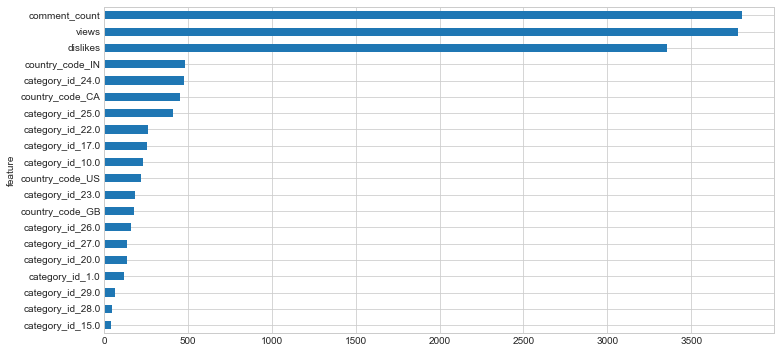

In [40]:
clf = LGBMRegressor(n_estimators=1000,
                   learning_rate=0.05,
                   colsample_bytree=0.76, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":100,"early_stopping_rounds":100,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.721258
[600]	valid_0's rmse: 0.683746
[900]	valid_0's rmse: 0.67534
[1200]	valid_0's rmse: 0.671192
[1500]	valid_0's rmse: 0.668965
[1800]	valid_0's rmse: 0.667426
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 0.666636

AV metric score for the validation set is 666.6363246429061

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.721113
[600]	valid_0's rmse: 0.687208
[900]	valid_0's rmse: 0.679797
[1200]	valid_0's rmse: 0.676404
[1500]	valid_0's rmse: 0.674785
[1800]	valid_0's rmse: 0.673901
Did not meet early stopping. Best iteration is:
[1931]	valid_0's rmse: 0.673594

AV metric score for the validation set is 673.5943697431178

------------------ Fold 3-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's r

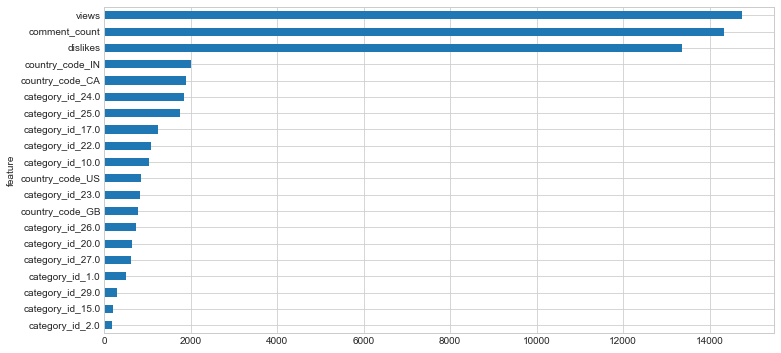

In [41]:
clf = LGBMRegressor(n_estimators=2000,
                   learning_rate=0.01,
                   colsample_bytree=0.76, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)


------------------ Fold 1-------------------
0:	learn: 1.9161623	test: 1.9077476	best: 1.9077476 (0)	total: 83.3ms	remaining: 4m 9s
200:	learn: 0.8395688	test: 0.8496237	best: 0.8496237 (200)	total: 1.91s	remaining: 26.6s
400:	learn: 0.7310593	test: 0.7459856	best: 0.7459856 (400)	total: 3.37s	remaining: 21.8s
600:	learn: 0.7071283	test: 0.7225519	best: 0.7225519 (600)	total: 4.82s	remaining: 19.2s
800:	learn: 0.6931874	test: 0.7085013	best: 0.7085013 (800)	total: 6.19s	remaining: 17s
1000:	learn: 0.6828767	test: 0.6984767	best: 0.6984767 (1000)	total: 7.55s	remaining: 15.1s
1200:	learn: 0.6741208	test: 0.6901979	best: 0.6901979 (1200)	total: 8.96s	remaining: 13.4s
1400:	learn: 0.6664207	test: 0.6833039	best: 0.6833039 (1400)	total: 10.5s	remaining: 11.9s
1600:	learn: 0.6604077	test: 0.6785152	best: 0.6785152 (1600)	total: 12.8s	remaining: 11.1s
1800:	learn: 0.6554195	test: 0.6750037	best: 0.6750022 (1798)	total: 14.7s	remaining: 9.8s
2000:	learn: 0.6510266	test: 0.6720600	best: 0.672

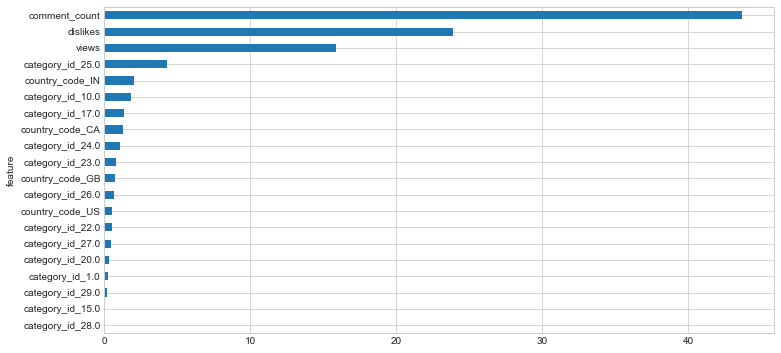

In [42]:
clf = CatBoostRegressor(n_estimators=3000,
                   learning_rate=0.01,
                   rsm = 0.4,
                   random_state=2054,
                   )
fit_params = {"verbose":200,"early_stopping_rounds":200}

cb_oofs,cb_preds,cb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)


------------------ Fold 1-------------------
[0]	validation_0-rmse:7.13994
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.67908
[400]	validation_0-rmse:0.67125
[600]	validation_0-rmse:0.66977
[800]	validation_0-rmse:0.66990
Stopping. Best iteration:
[723]	validation_0-rmse:0.66953


AV metric score for the validation set is 669.5272733075626

------------------ Fold 2-------------------
[0]	validation_0-rmse:7.12723
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.68844
[400]	validation_0-rmse:0.68107
[600]	validation_0-rmse:0.67954
Stopping. Best iteration:
[599]	validation_0-rmse:0.67951


AV metric score for the validation set is 679.5125847088206

------------------ Fold 3-------------------
[0]	validation_0-rmse:7.11973
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:0.68119
[400]	validation_0-rmse:0.67497
[600]	validation_0-rmse:0.67439
Stopping. Best

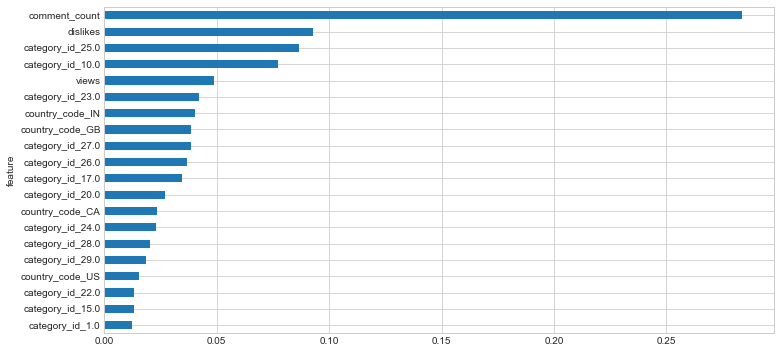

In [43]:
clf = XGBRegressor(n_estimators=1000,
                   learning_rate=0.05,
                   colsample_bytree = 0.5,
                   random_state=1452,
                   )
fit_params = {"verbose":200,"early_stopping_rounds":200}

xg_oofs,xg_preds,xg_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

# Feature Engineering (most imp.)

### Helper function

In [44]:
def join_df(train,test):
    df = pd.concat([train,test]).reset_index(drop=True)
    features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
    df[num_cols + ["likes"]] = df[num_cols+["likes"]].apply(lambda x: np.log1p(x))
    
    return df,features

def split_df_and_get_features(df,train_nrows):
    train,test=df[:train_nrows].reset_index(drop=True),df[train_nrows:].reset_index(drop=True)
    features = [c for c in train.columns if c not in [ID_COL,TARGET_COL]]
    
    return train,test,features

In [45]:
df, features = join_df(train,test)

In [46]:
cat_cols = ["category_id","country_code","channel_title"]

Label Encoding

In [47]:
df[cat_cols] = df[cat_cols].apply(lambda x:pd.factorize(x)[0])

In [48]:
df.head(1)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,0,0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,0,7.763021


Date time features

In [49]:
df["publish_date"] = pd.to_datetime(df["publish_date"],format="%Y-%m-%d")
df["publish_date_days_since_start"] = (df["publish_date"] - df["publish_date"].min()).dt.days

df["publish_date_day_of_week"] = df["publish_date"].dt.dayofweek
df["publish_year"] = df["publish_date"].dt.year
df["publish_month"] = df["publish_date"].dt.month

In [50]:
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']]

In [51]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_year',
 'publish_month']

In [52]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.631812
[600]	valid_0's rmse: 0.612002
[900]	valid_0's rmse: 0.603912
[1200]	valid_0's rmse: 0.599437
[1500]	valid_0's rmse: 0.596027
[1800]	valid_0's rmse: 0.594009
[2100]	valid_0's rmse: 0.593281
[2400]	valid_0's rmse: 0.592734
[2700]	valid_0's rmse: 0.591935
[3000]	valid_0's rmse: 0.5914
[3300]	valid_0's rmse: 0.591347
Early stopping, best iteration is:
[3164]	valid_0's rmse: 0.591147

AV metric score for the validation set is 591.1466534497896

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.638311
[600]	valid_0's rmse: 0.619742
[900]	valid_0's rmse: 0.611908
[1200]	valid_0's rmse: 0.607079
[1500]	valid_0's rmse: 0.604709
[1800]	valid_0's rmse: 0.60396
[2100]	valid_0's rmse: 0.602692
[2400]	valid_0's rmse: 0.602465
[2700]	valid_0's rmse: 0.601774
[3000]	valid_0's rmse: 0.

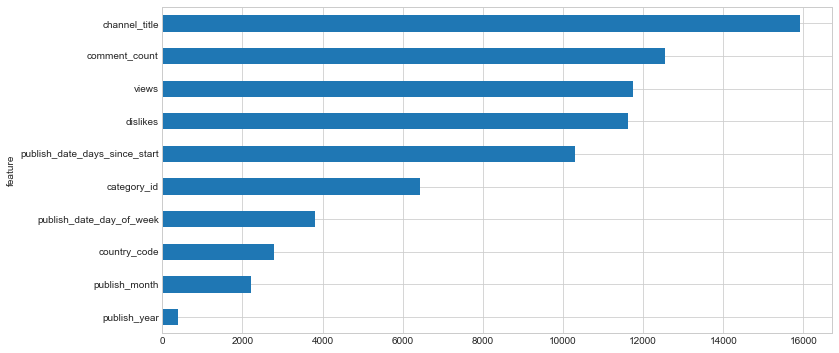

In [53]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

In [54]:
train_proc.head(1)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes,publish_date_days_since_start,publish_date_day_of_week,publish_year,publish_month
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,0,0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,0,7.763021,4160,1,2017,12


## Feature Frequencies

If a channel is posting a lot of videos it might get more likes, so we can check that by checking the frequency of channels and there corresponding likes......

#### Encoding Channel title

In [55]:
df.channel_title.nunique()

6979

In [56]:
df.channel_title.value_counts()

116     233
299     180
15      179
92      169
406     152
       ... 
3832      1
5883      1
5551      1
1453      1
4078      1
Name: channel_title, Length: 6979, dtype: int64

In [57]:
df.publish_date.value_counts()

2018-01-29    282
2017-12-13    258
2018-01-19    257
2017-12-20    255
2018-01-12    255
             ... 
2017-10-27      1
2013-10-27      1
2015-03-29      1
2011-02-03      1
2013-03-20      1
Name: publish_date, Length: 399, dtype: int64

Replace channel title name and publish date with number of videos for each channel title and publish date so that we can get to know the frequecy of each channel and number of videos uploaded on a single date

In [58]:
df["channel_title_num_videos"] = df["channel_title"].map(df["channel_title"].value_counts())
df["publish_date_num_videos"] = df["publish_date"].map(df["publish_date"].value_counts())

In [59]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])

In [60]:
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.608363
[600]	valid_0's rmse: 0.584571
[900]	valid_0's rmse: 0.572998
[1200]	valid_0's rmse: 0.567373
[1500]	valid_0's rmse: 0.563138
[1800]	valid_0's rmse: 0.560296
[2100]	valid_0's rmse: 0.558275
[2400]	valid_0's rmse: 0.55671
[2700]	valid_0's rmse: 0.555969
[3000]	valid_0's rmse: 0.555349
Early stopping, best iteration is:
[3098]	valid_0's rmse: 0.555199

AV metric score for the validation set is 555.1991985882341

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.613145
[600]	valid_0's rmse: 0.590227
[900]	valid_0's rmse: 0.580194
[1200]	valid_0's rmse: 0.573934
[1500]	valid_0's rmse: 0.570374
[1800]	valid_0's rmse: 0.566635
[2100]	valid_0's rmse: 0.564748
[2400]	valid_0's rmse: 0.563521
[2700]	valid_0's rmse: 0.562893
[3000]	valid_0's rmse: 0.562336
Early stopping, best it

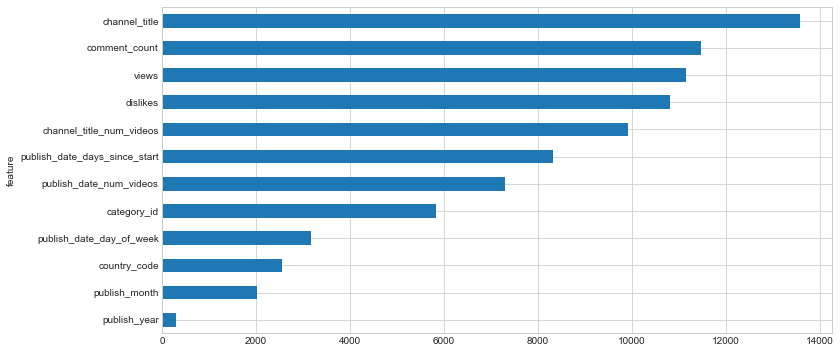

In [61]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

In [63]:
df["channel_in_n_countries"] = df.groupby("channel_title")["country_code"].transform("nunique")
df["channel_in_n_countries"].unique()

array([2, 1, 3, 4], dtype=int64)

In [64]:
df["channel_in_n_countries"].head()

0    2
1    1
2    1
3    1
4    1
Name: channel_in_n_countries, dtype: int64

In [65]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.603709
[600]	valid_0's rmse: 0.580205
[900]	valid_0's rmse: 0.567329
[1200]	valid_0's rmse: 0.561142
[1500]	valid_0's rmse: 0.557417
[1800]	valid_0's rmse: 0.553811
[2100]	valid_0's rmse: 0.552283
[2400]	valid_0's rmse: 0.551667
[2700]	valid_0's rmse: 0.551001
[3000]	valid_0's rmse: 0.550333
[3300]	valid_0's rmse: 0.549939
[3600]	valid_0's rmse: 0.550285
Early stopping, best iteration is:
[3436]	valid_0's rmse: 0.549725

AV metric score for the validation set is 549.7247648369083

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.604718
[600]	valid_0's rmse: 0.584637
[900]	valid_0's rmse: 0.575535
[1200]	valid_0's rmse: 0.569474
[1500]	valid_0's rmse: 0.566047
[1800]	valid_0's rmse: 0.564031
[2100]	valid_0's rmse: 0.562625
[2400]	valid_0's rmse: 0.56152
[2700]	valid_0's rmse: 

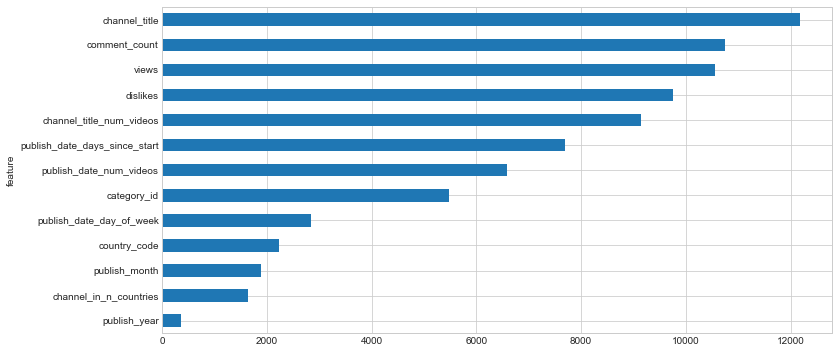

In [66]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

Grouping Features

In [67]:
df["channel_title_mean_view"] = df.groupby("channel_title")["views"].transform('mean')
df["channel_title_max_views"] = df.groupby("channel_title")["views"].transform('max')
df["channel_title_min_views"] = df.groupby("channel_title")["views"].transform('min')

df["channel_title_mean_comments"] = df.groupby("channel_title")["comment_count"].transform("mean")
df["channel_title_max_comments"] = df.groupby("channel_title")["comment_count"].transform("max")
df["channel_title_min_comments"] = df.groupby("channel_title")["comment_count"].transform("min")

In [68]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.557655
[600]	valid_0's rmse: 0.532166
[900]	valid_0's rmse: 0.519408
[1200]	valid_0's rmse: 0.512266
[1500]	valid_0's rmse: 0.508496
[1800]	valid_0's rmse: 0.506258
[2100]	valid_0's rmse: 0.505042
[2400]	valid_0's rmse: 0.503978
[2700]	valid_0's rmse: 0.502961
[3000]	valid_0's rmse: 0.502519
[3300]	valid_0's rmse: 0.50183
[3600]	valid_0's rmse: 0.501319
[3900]	valid_0's rmse: 0.500759
Early stopping, best iteration is:
[3866]	valid_0's rmse: 0.500711

AV metric score for the validation set is 500.7105721243611

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.55092
[600]	valid_0's rmse: 0.526312
[900]	valid_0's rmse: 0.516524
[1200]	valid_0's rmse: 0.510988
[1500]	valid_0's rmse: 0.50834
[1800]	valid_0's rmse: 0.505832
[2100]	valid_0's rmse: 0.504607
[2400]	valid_0's rmse: 0.

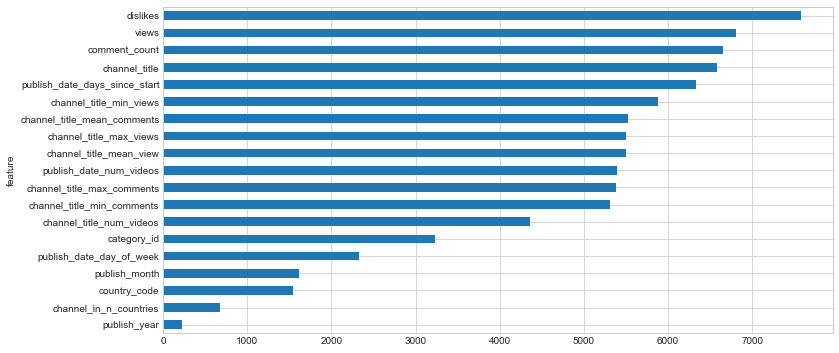

In [69]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

In [70]:
df["channel_title_mean_dislikes"] = df.groupby("channel_title")["dislikes"].transform("mean")
df["channel_title_max_dislikes"] = df.groupby("channel_title")["dislikes"].transform("max")
df["channel_title_min_dislikes"] = df.groupby("channel_title")["dislikes"].transform("min")

In [71]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.546949
[600]	valid_0's rmse: 0.521106
[900]	valid_0's rmse: 0.509216
[1200]	valid_0's rmse: 0.50367
[1500]	valid_0's rmse: 0.50007
[1800]	valid_0's rmse: 0.49811
[2100]	valid_0's rmse: 0.49671
[2400]	valid_0's rmse: 0.495285
[2700]	valid_0's rmse: 0.494352
[3000]	valid_0's rmse: 0.493533
[3300]	valid_0's rmse: 0.492926
[3600]	valid_0's rmse: 0.492497
[3900]	valid_0's rmse: 0.492148
[4200]	valid_0's rmse: 0.491895
[4500]	valid_0's rmse: 0.491586
[4800]	valid_0's rmse: 0.491481
Did not meet early stopping. Best iteration is:
[4888]	valid_0's rmse: 0.491415

AV metric score for the validation set is 491.415338761199

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.544942
[600]	valid_0's rmse: 0.52206
[900]	valid_0's rmse: 0.511343
[1200]	valid_0's rmse: 0.505058
[1500]	valid_0'

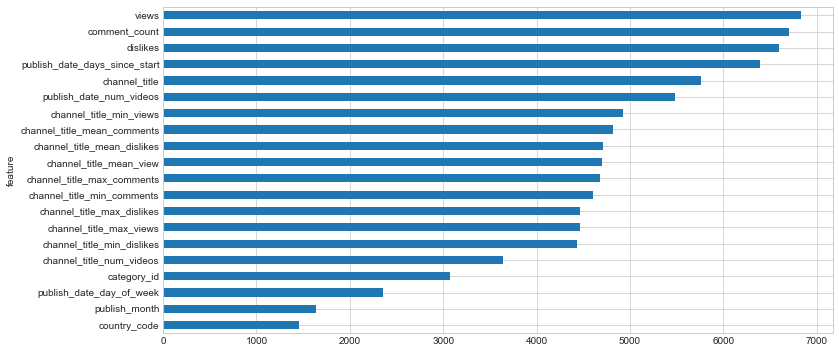

In [72]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

### Feature engineering for text data

#### Length of text columns

In [73]:
df["title_len"] = df["title"].apply(lambda x:len(x))
df["tags_len"] = df["tags"].apply(lambda x:len(x))
df["description_len"] = df["description"].apply(lambda x:len(x))

In [74]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.542502
[600]	valid_0's rmse: 0.514636
[900]	valid_0's rmse: 0.503791
[1200]	valid_0's rmse: 0.497321
[1500]	valid_0's rmse: 0.493791
[1800]	valid_0's rmse: 0.491424
[2100]	valid_0's rmse: 0.489414
[2400]	valid_0's rmse: 0.488533
[2700]	valid_0's rmse: 0.487161
[3000]	valid_0's rmse: 0.486284
[3300]	valid_0's rmse: 0.485686
[3600]	valid_0's rmse: 0.485014
[3900]	valid_0's rmse: 0.484493
[4200]	valid_0's rmse: 0.484322
[4500]	valid_0's rmse: 0.484004
[4800]	valid_0's rmse: 0.48376
Early stopping, best iteration is:
[4791]	valid_0's rmse: 0.483734

AV metric score for the validation set is 483.73370236887837

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.538923
[600]	valid_0's rmse: 0.513022
[900]	valid_0's rmse: 0.502915
[1200]	valid_0's rmse: 0.497355
[1500]	valid_0's rmse:

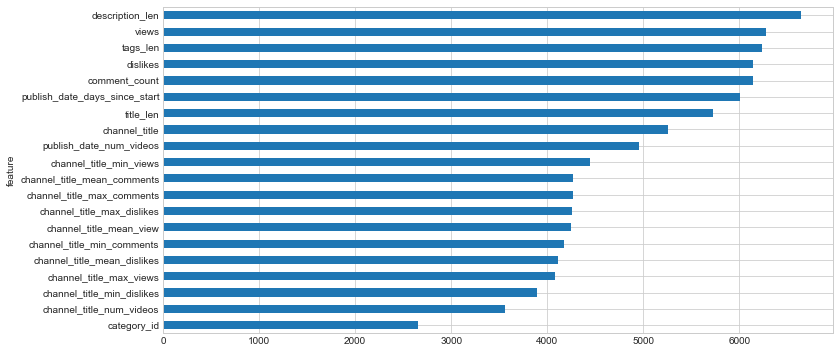

In [75]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

#### Bag of words for text based features

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
?CountVectorizer

In [77]:
TOP_N_WORDS = 50

vec = CountVectorizer(max_features=TOP_N_WORDS)
txt_to_fts = vec.fit_transform(df["description"]).toarray()
txt_to_fts.shape

(37231, 50)

In [78]:
c = "description"
txt_fts_names = [c+f"_word_count_{i}_count" for i in range(TOP_N_WORDS)]
df[txt_fts_names]=txt_to_fts

In [79]:
train_proc,test_proc,features = split_df_and_get_features(df,train.shape[0])
features = [c for c in df.columns if c not in [ID_COL,TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title','tags','description','publish_date']] 
# Need to run this again as we have added some new features


------------------ Fold 1-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.531434
[600]	valid_0's rmse: 0.510703
[900]	valid_0's rmse: 0.500407
[1200]	valid_0's rmse: 0.493069
[1500]	valid_0's rmse: 0.488031
[1800]	valid_0's rmse: 0.485208
[2100]	valid_0's rmse: 0.483836
[2400]	valid_0's rmse: 0.482301
[2700]	valid_0's rmse: 0.481769
[3000]	valid_0's rmse: 0.481059
[3300]	valid_0's rmse: 0.480316
[3600]	valid_0's rmse: 0.480119
[3900]	valid_0's rmse: 0.479584
[4200]	valid_0's rmse: 0.479488
[4500]	valid_0's rmse: 0.479479
Early stopping, best iteration is:
[4382]	valid_0's rmse: 0.479381

AV metric score for the validation set is 479.38061019651155

------------------ Fold 2-------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.528342
[600]	valid_0's rmse: 0.508307
[900]	valid_0's rmse: 0.498233
[1200]	valid_0's rmse: 0.492808
[1500]	valid_0's rmse: 0.489716
[1800]	valid_0's rmse

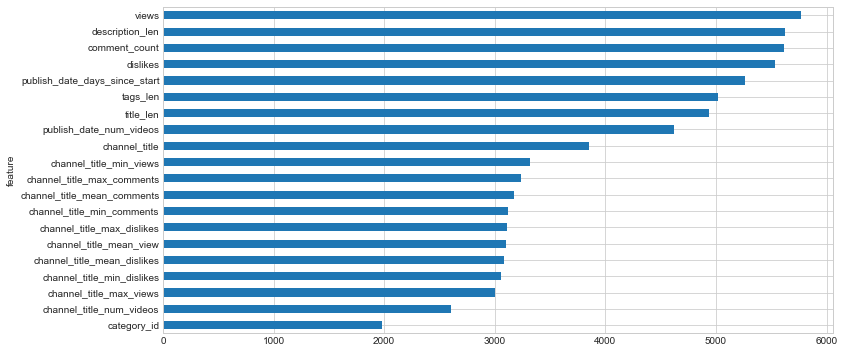

In [80]:
clf = LGBMRegressor(n_estimators=5000,
                   learning_rate=0.05,
                   colsample_bytree=0.65, # each tree will run on these percentage of features
                   metric="None",
                   )

fit_params = {"verbose":300,"early_stopping_rounds":200,"eval_metric":"rmse"}

lgb_oofs,lgb_preds,lgb_fi = run_gradient_boosting(clf,fit_params,train_proc,test_proc,cat_num_cols)

In [81]:
lgb_preds_t = np.expm1(lgb_preds)

In [83]:
lgb_preds_t.shape

(11170,)

In [84]:
dataframe_test = pd.DataFrame(data = lgb_preds_t,columns=["likes"])

In [85]:
dataframe_test

,likes
0,750.529528
1,2442.720650
2,41.791873
3,2934.659221
4,578.011344
...,...
11165,1543.848964
11166,2188.130909
11167,7955.594274
11168,5284.757517


In [86]:
ss = pd.read_csv("sample_submission.csv")

In [87]:
ss["likes"] = lgb_preds_t

In [88]:
ss.head()

,video_id,likes
0,87185,750.529528
1,9431,2442.720650
2,40599,41.791873
3,494,2934.659221
4,73942,578.011344


In [89]:
ss.to_csv("solution.csv",index=False)